In [1]:
import pandas
import matplotlib.pyplot as plt

If you don't have a Muse headset, there's a sample CSV available from https://musemonitor.com/misc/SampleCSV.zip

In [2]:
df = pandas.read_csv('muse_recordings/museMonitor_2019-09-29--09-06-02_-1214416821.csv')

In [3]:
df.shape

(2655, 39)

The BF stands for bad fit and the J for jaw clenching.
* BF appears when the headband loses contact at too many places and is unable to transmit correct data.
* J appears when muscle tension in face jaw shoulder distort the data too much.


Electrode locations: TP9, TP10, AF7 and AF8 are EEG scalp nodes. They're more of “markers” on a map of the scalp rather than having a specific purpose.  See <img src="https://cdn-images-1.medium.com/max/1000/1*pFYtvublnXnl8hZehCAriw.png" width="300">

EEG will not tell you anything about eye movements. At most, it will tell you something about blinking, because the muscle activity above the eyes generates electricity that is picked up by the Muse, and that noise is quite loud in signal processing (much like jaw clenching).

<a href="https://forum.choosemuse.com/t/what-do-tp9-tp10-af7-af8-measure/4892">citation</a>; see also https://musemonitor.com/FAQ.php

In [4]:
df.head().T

,0,1,2,3,4
TimeStamp,2019-09-29 09:06:02.647,2019-09-29 09:06:03.574,2019-09-29 09:06:03.670,2019-09-29 09:06:03.882,2019-09-29 09:06:04.120
Delta_TP9,1.28219,NaN,1.28219,NaN,NaN
Delta_AF7,0,NaN,0,NaN,NaN
Delta_AF8,0,NaN,0,NaN,NaN
Delta_TP10,1.40765,NaN,0.906432,NaN,NaN
Theta_TP9,1.31775,NaN,1.31775,NaN,NaN
Theta_AF7,0,NaN,0,NaN,NaN
Theta_AF8,0,NaN,0,NaN,NaN
Theta_TP10,1.36627,NaN,1.08288,NaN,NaN
Alpha_TP9,1.16902,NaN,1.16902,NaN,NaN


In [5]:
df.dtypes

TimeStamp           object
Delta_TP9          float64
Delta_AF7          float64
Delta_AF8          float64
Delta_TP10         float64
Theta_TP9          float64
Theta_AF7          float64
Theta_AF8          float64
Theta_TP10         float64
Alpha_TP9          float64
Alpha_AF7          float64
Alpha_AF8          float64
Alpha_TP10         float64
Beta_TP9           float64
Beta_AF7           float64
Beta_AF8           float64
Beta_TP10          float64
Gamma_TP9          float64
Gamma_AF7          float64
Gamma_AF8          float64
Gamma_TP10         float64
RAW_TP9            float64
RAW_AF7            float64
RAW_AF8            float64
RAW_TP10           float64
AUX_RIGHT          float64
Accelerometer_X    float64
Accelerometer_Y    float64
Accelerometer_Z    float64
Gyro_X             float64
Gyro_Y             float64
Gyro_Z             float64
HeadBandOn         float64
HSI_TP9            float64
HSI_AF7            float64
HSI_AF8            float64
HSI_TP10           float64
B

In [6]:
df['TimeStamp'][0]

'2019-09-29 09:06:02.647'

In [7]:
df['time']=pandas.to_datetime(df['TimeStamp'])

In [8]:
# https://matplotlib.org/3.1.1/api/markers_api.html
marker_shape_dict={}
#marker_shape_dict['Alpha']='.'
#marker_shape_dict['Beta']='s'
#marker_shape_dict['Gamma']='*'
#marker_shape_dict['Delta']='^'
marker_shape_dict['TP9']='.'
marker_shape_dict['AF7']='x'
marker_shape_dict['AF8']='+'
marker_shape_dict['TP10']='^'

color_dict={}
color_dict['Alpha']='blue'
color_dict['Beta']='green'
color_dict['Gamma']='orange'
color_dict['Theta']='purple'
color_dict['Delta']='red'

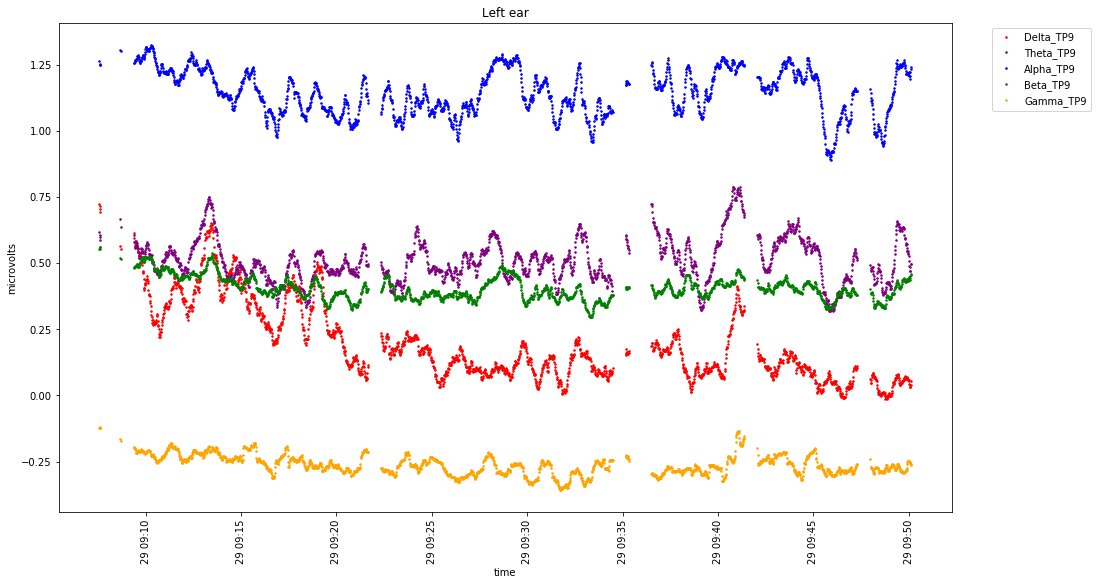

<Figure size 432x288 with 0 Axes>

In [13]:
window_size=40
for col_name,col_type in df.dtypes.iteritems():
    if col_type=='float64':
        #print(col_name.split('_'))
        col_prefix = col_name.split('_')[0]
        try:
            col_suffix = col_name.split('_')[1]
        except IndexError:
            col_suffix = None
        if (col_prefix in color_dict.keys()) and (col_suffix=='TP9'):
            plt.plot(df['time'],df[col_name].rolling(window_size).mean(),marker=marker_shape_dict[col_suffix],linestyle='None',markersize=3,color=color_dict[col_prefix])
           #plt.plot(df['time'],df[col_name],                            marker=marker_shape_dict[col_suffix],linestyle='None',markersize=3,color=color_dict[col_prefix])
           #plt.plot(df['time'],df[col_name].rolling(window_size).mean(),marker=marker_shape_dict[col_suffix],linestyle='None',markersize=3)
           #plt.plot(df['time'],df[col_name].rolling(window_size).mean(),marker=marker_shape_dict[col_suffix])
            
plt.xlabel('time')
plt.title('Left ear')
plt.xticks(rotation='vertical')
plt.ylabel('microvolts')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left") # https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot/43439132#43439132
fig = plt.gcf()
fig.set_size_inches(16,9)
plt.show()
plt.savefig('meditation.png') 

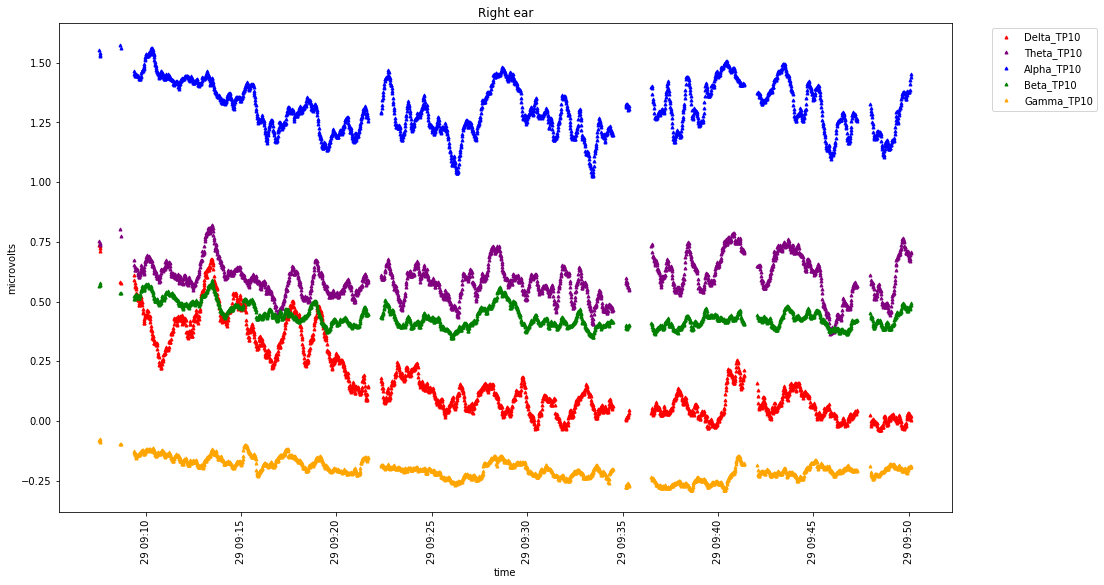

<Figure size 432x288 with 0 Axes>

In [14]:
window_size=40
for col_name,col_type in df.dtypes.iteritems():
    if col_type=='float64':
        #print(col_name.split('_'))
        col_prefix = col_name.split('_')[0]
        try:
            col_suffix = col_name.split('_')[1]
        except IndexError:
            col_suffix = None
        if (col_prefix in color_dict.keys()) and (col_suffix=='TP10'):
            plt.plot(df['time'],df[col_name].rolling(window_size).mean(),marker=marker_shape_dict[col_suffix],linestyle='None',markersize=3,color=color_dict[col_prefix])
           #plt.plot(df['time'],df[col_name],                            marker=marker_shape_dict[col_suffix],linestyle='None',markersize=3,color=color_dict[col_prefix])
           #plt.plot(df['time'],df[col_name].rolling(window_size).mean(),marker=marker_shape_dict[col_suffix],linestyle='None',markersize=3)
           #plt.plot(df['time'],df[col_name].rolling(window_size).mean(),marker=marker_shape_dict[col_suffix])
            
plt.title('Right ear')
plt.xlabel('time')
plt.xticks(rotation='vertical')
plt.ylabel('microvolts')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left") # https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot/43439132#43439132
fig = plt.gcf()
fig.set_size_inches(16,9)
plt.show()
plt.savefig('meditation.png') 

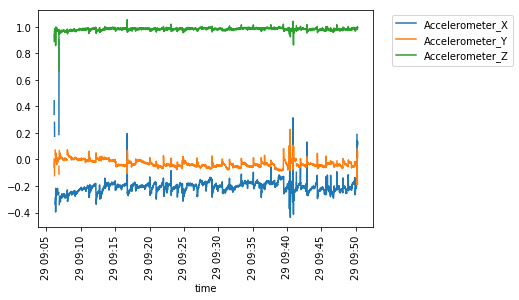

In [10]:
for col_name,col_type in df.dtypes.iteritems():
    if col_type=='float64':
        #print(col_name.split('_'))
        col_prefix = col_name.split('_')[0]
        try:
            col_suffix = col_name.split('_')[1]
        except IndexError:
            col_suffix = None
        if (col_prefix =='Accelerometer'):
            plt.plot(df['time'],df[col_name])
plt.xlabel('time')
plt.xticks(rotation='vertical')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left") # https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot/43439132#43439132
#fig = plt.gcf()
#fig.set_size_inches(16,9)
plt.show()


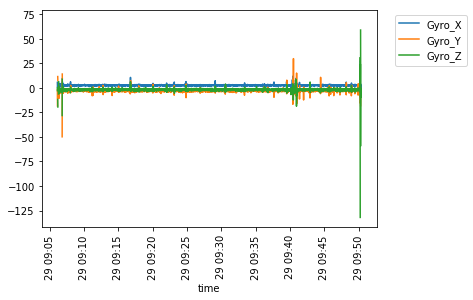

In [11]:
for col_name,col_type in df.dtypes.iteritems():
    if col_type=='float64':
        #print(col_name.split('_'))
        col_prefix = col_name.split('_')[0]
        try:
            col_suffix = col_name.split('_')[1]
        except IndexError:
            col_suffix = None
        if (col_prefix =='Gyro'):
            plt.plot(df['time'],df[col_name])
plt.xlabel('time')
plt.xticks(rotation='vertical')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left") # https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot/43439132#43439132
#fig = plt.gcf()
#fig.set_size_inches(16,9)
plt.show()

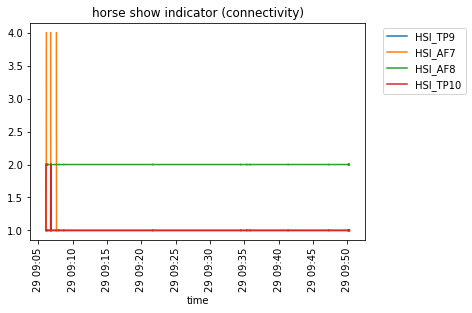

1 is good, 2 medium and 4 bad


In [17]:
for col_name,col_type in df.dtypes.iteritems():
    if col_type=='float64':
        #print(col_name.split('_'))
        col_prefix = col_name.split('_')[0]
        try:
            col_suffix = col_name.split('_')[1]
        except IndexError:
            col_suffix = None
        if (col_prefix =='HSI'):
            plt.plot(df['time'],df[col_name])
plt.title('horse show indicator (connectivity)')
plt.xlabel('time')
plt.xticks(rotation='vertical')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left") # https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot/43439132#43439132
#fig = plt.gcf()
#fig.set_size_inches(16,9)
plt.show()
print('1 is good, 2 medium and 4 bad')